# Submission Pertama Menyelesaikan Permasalahan Human Resources

- Nama : Reza Faisal
- Email : rezha.faizal567@gmail.com
- ID Dicoding : rezafaisal

## Persiapan

### Menyiapkann library yang dibutuhkan

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
import joblib
from sklearn.metrics import silhouette_score

### Menyiapkan data yang dibutuhkan

In [2]:
source_df = pd.read_csv('dataset/employee_data.csv')

## Data Understanding

In [3]:
source_df.head()

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,...,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,...,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,...,2,80,3,20,2,3,5,3,0,2


In [4]:
source_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1470 non-null   int64  
 1   Age                       1470 non-null   int64  
 2   Attrition                 1058 non-null   float64
 3   BusinessTravel            1470 non-null   object 
 4   DailyRate                 1470 non-null   int64  
 5   Department                1470 non-null   object 
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1470 non-null   object 
 9   EmployeeCount             1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

In [5]:
# cek dimensi dataset
source_df.shape

(1470, 35)

## Data Preprocessing

### Menangani Missing Value & Duplicate

In [6]:

# cek missing value
source_df.isna().sum()

EmployeeId                    0
Age                           0
Attrition                   412
BusinessTravel                0
DailyRate                     0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EmployeeCount                 0
EnvironmentSatisfaction       0
Gender                        0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome                 0
MonthlyRate                   0
NumCompaniesWorked            0
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
WorkLifeBalance               0
YearsAtC

In [7]:
# cek duplikat
source_df.duplicated().sum()

np.int64(0)

In [77]:
# hapus missing value
clean_df = source_df.dropna()

### Menangani Outlier

In [78]:
clean_df.describe(include='all')

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1058.000000,1058.000000,1058.000000,1058,1058.000000,1058,1058.000000,1058.000000,1058,1058.0,...,1058.000000,1058.0,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.00000,1058.000000,1058.000000
unique,NaN,NaN,NaN,3,NaN,3,NaN,NaN,6,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Travel_Rarely,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,746,NaN,701,NaN,NaN,436,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,736.656900,37.055766,0.169187,NaN,809.542533,NaN,8.978261,2.879017,NaN,1.0,...,2.726843,80.0,0.762760,11.435728,2.769376,2.763705,7.065217,4.26087,2.203214,4.142722
std,427.440538,9.410421,0.375094,NaN,408.478049,NaN,8.040608,1.031442,NaN,0.0,...,1.090970,0.0,0.837537,8.016429,1.302689,0.707392,6.265227,3.61747,3.266948,3.599044
min,2.000000,18.000000,0.000000,NaN,102.000000,NaN,1.000000,1.000000,NaN,1.0,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000
25%,364.250000,30.000000,0.000000,NaN,465.250000,NaN,2.000000,2.000000,NaN,1.0,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.00000,0.000000,2.000000
50%,731.500000,36.000000,0.000000,NaN,817.500000,NaN,7.000000,3.000000,NaN,1.0,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.00000,1.000000,3.000000
75%,1117.750000,43.000000,0.000000,NaN,1168.500000,NaN,13.000000,4.000000,NaN,1.0,...,4.000000,80.0,1.000000,16.000000,3.000000,3.000000,9.000000,7.00000,3.000000,7.000000


<Axes: xlabel='YearsAtCompany'>

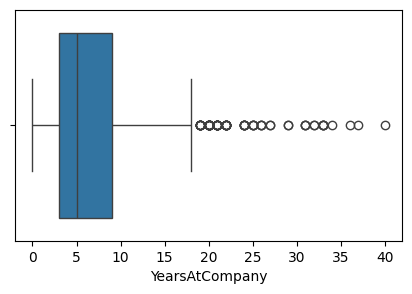

In [79]:

# cek outlier fitur balance
plt.figure(figsize=(5,3))
sns.boxplot(x=clean_df['YearsAtCompany'])

<Axes: xlabel='YearsWithCurrManager'>

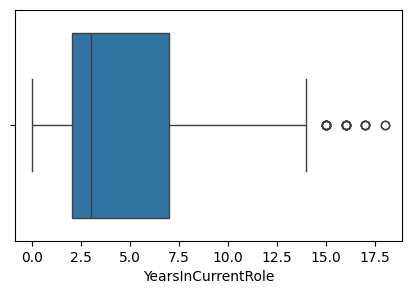

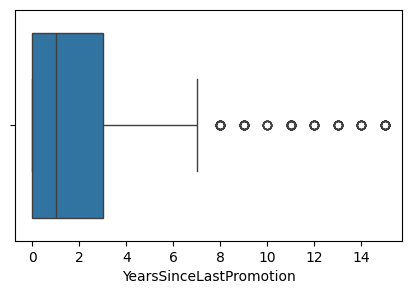

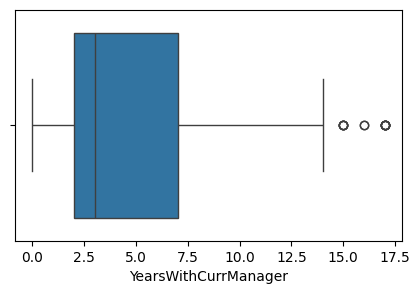

In [80]:

# cek outlier fitur balance
plt.figure(figsize=(5,3))
sns.boxplot(x=source_df['YearsInCurrentRole'])


# cek outlier fitur balance
plt.figure(figsize=(5,3))
sns.boxplot(x=source_df['YearsSinceLastPromotion'])


# cek outlier fitur balance
plt.figure(figsize=(5,3))
sns.boxplot(x=source_df['YearsWithCurrManager'])

In [82]:
# menghapus outlier
outlier_columns = ['YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

Q1 = clean_df[outlier_columns].quantile(0.25)
Q3 = clean_df[outlier_columns].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

new_df = clean_df[~((clean_df[outlier_columns] < lower_bound) | (clean_df[outlier_columns] > upper_bound)).any(axis=1)]

In [83]:
new_df.shape

(935, 35)

### Univariate Analysis

In [153]:
categorical_features = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'MaritalStatus', 'JobRole', 'Over18', 'OverTime']
numerical_features = ['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate',  'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

print(len(categorical_features), len(numerical_features))

8 24


BusinessTravel
                   jumlah sampel  persentase
BusinessTravel                              
Travel_Rarely                661        70.7
Travel_Frequently            180        19.3
Non-Travel                    94        10.1


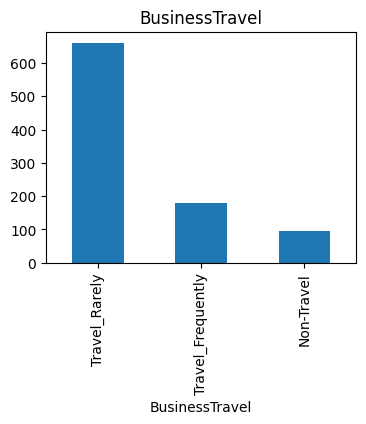



Department
                        jumlah sampel  persentase
Department                                       
Research & Development            621        66.4
Sales                             282        30.2
Human Resources                    32         3.4


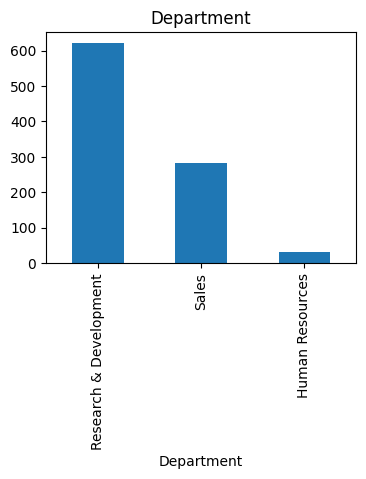



EducationField
                  jumlah sampel  persentase
EducationField                             
Life Sciences               385        41.2
Medical                     285        30.5
Marketing                   110        11.8
Technical Degree             89         9.5
Other                        54         5.8
Human Resources              12         1.3


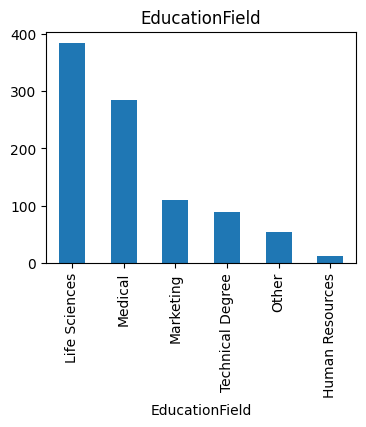



Gender
        jumlah sampel  persentase
Gender                           
Male              552        59.0
Female            383        41.0


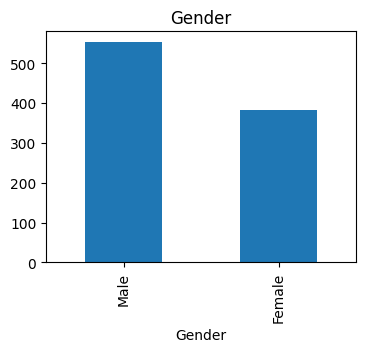



MaritalStatus
               jumlah sampel  persentase
MaritalStatus                           
Married                  407        43.5
Single                   317        33.9
Divorced                 211        22.6


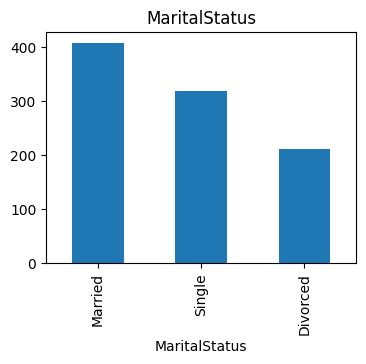



JobRole
                           jumlah sampel  persentase
JobRole                                             
Sales Executive                      209        22.4
Research Scientist                   205        21.9
Laboratory Technician                178        19.0
Manufacturing Director                99        10.6
Healthcare Representative             71         7.6
Sales Representative                  58         6.2
Research Director                     47         5.0
Manager                               39         4.2
Human Resources                       29         3.1


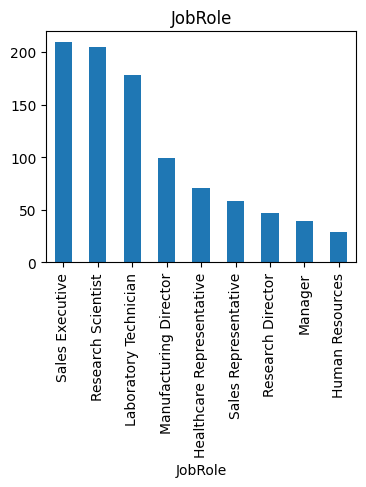



Over18
        jumlah sampel  persentase
Over18                           
Y                 935       100.0


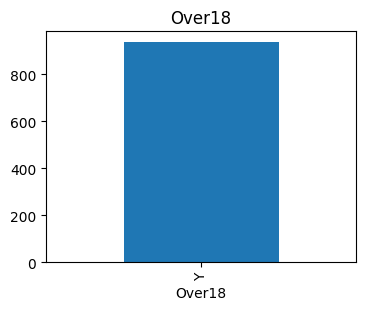



OverTime
          jumlah sampel  persentase
OverTime                           
No                  664        71.0
Yes                 271        29.0


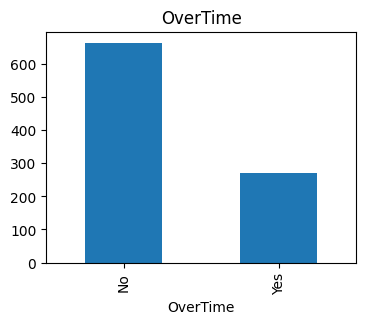

In [102]:
# menampilkan semua categorical
for categorical_feature in categorical_features:
  count = new_df[categorical_feature].value_counts()
  percent = 100*new_df[categorical_feature].value_counts(normalize=True)
  df = pd.DataFrame({
      'jumlah sampel': count,
      'persentase': percent.round(1)
  })
  print(f"{categorical_feature}")
  print(df)

  plt.figure(figsize=(4,3))
  count.plot(kind='bar', title=categorical_feature)
  plt.show()
  print("\n")

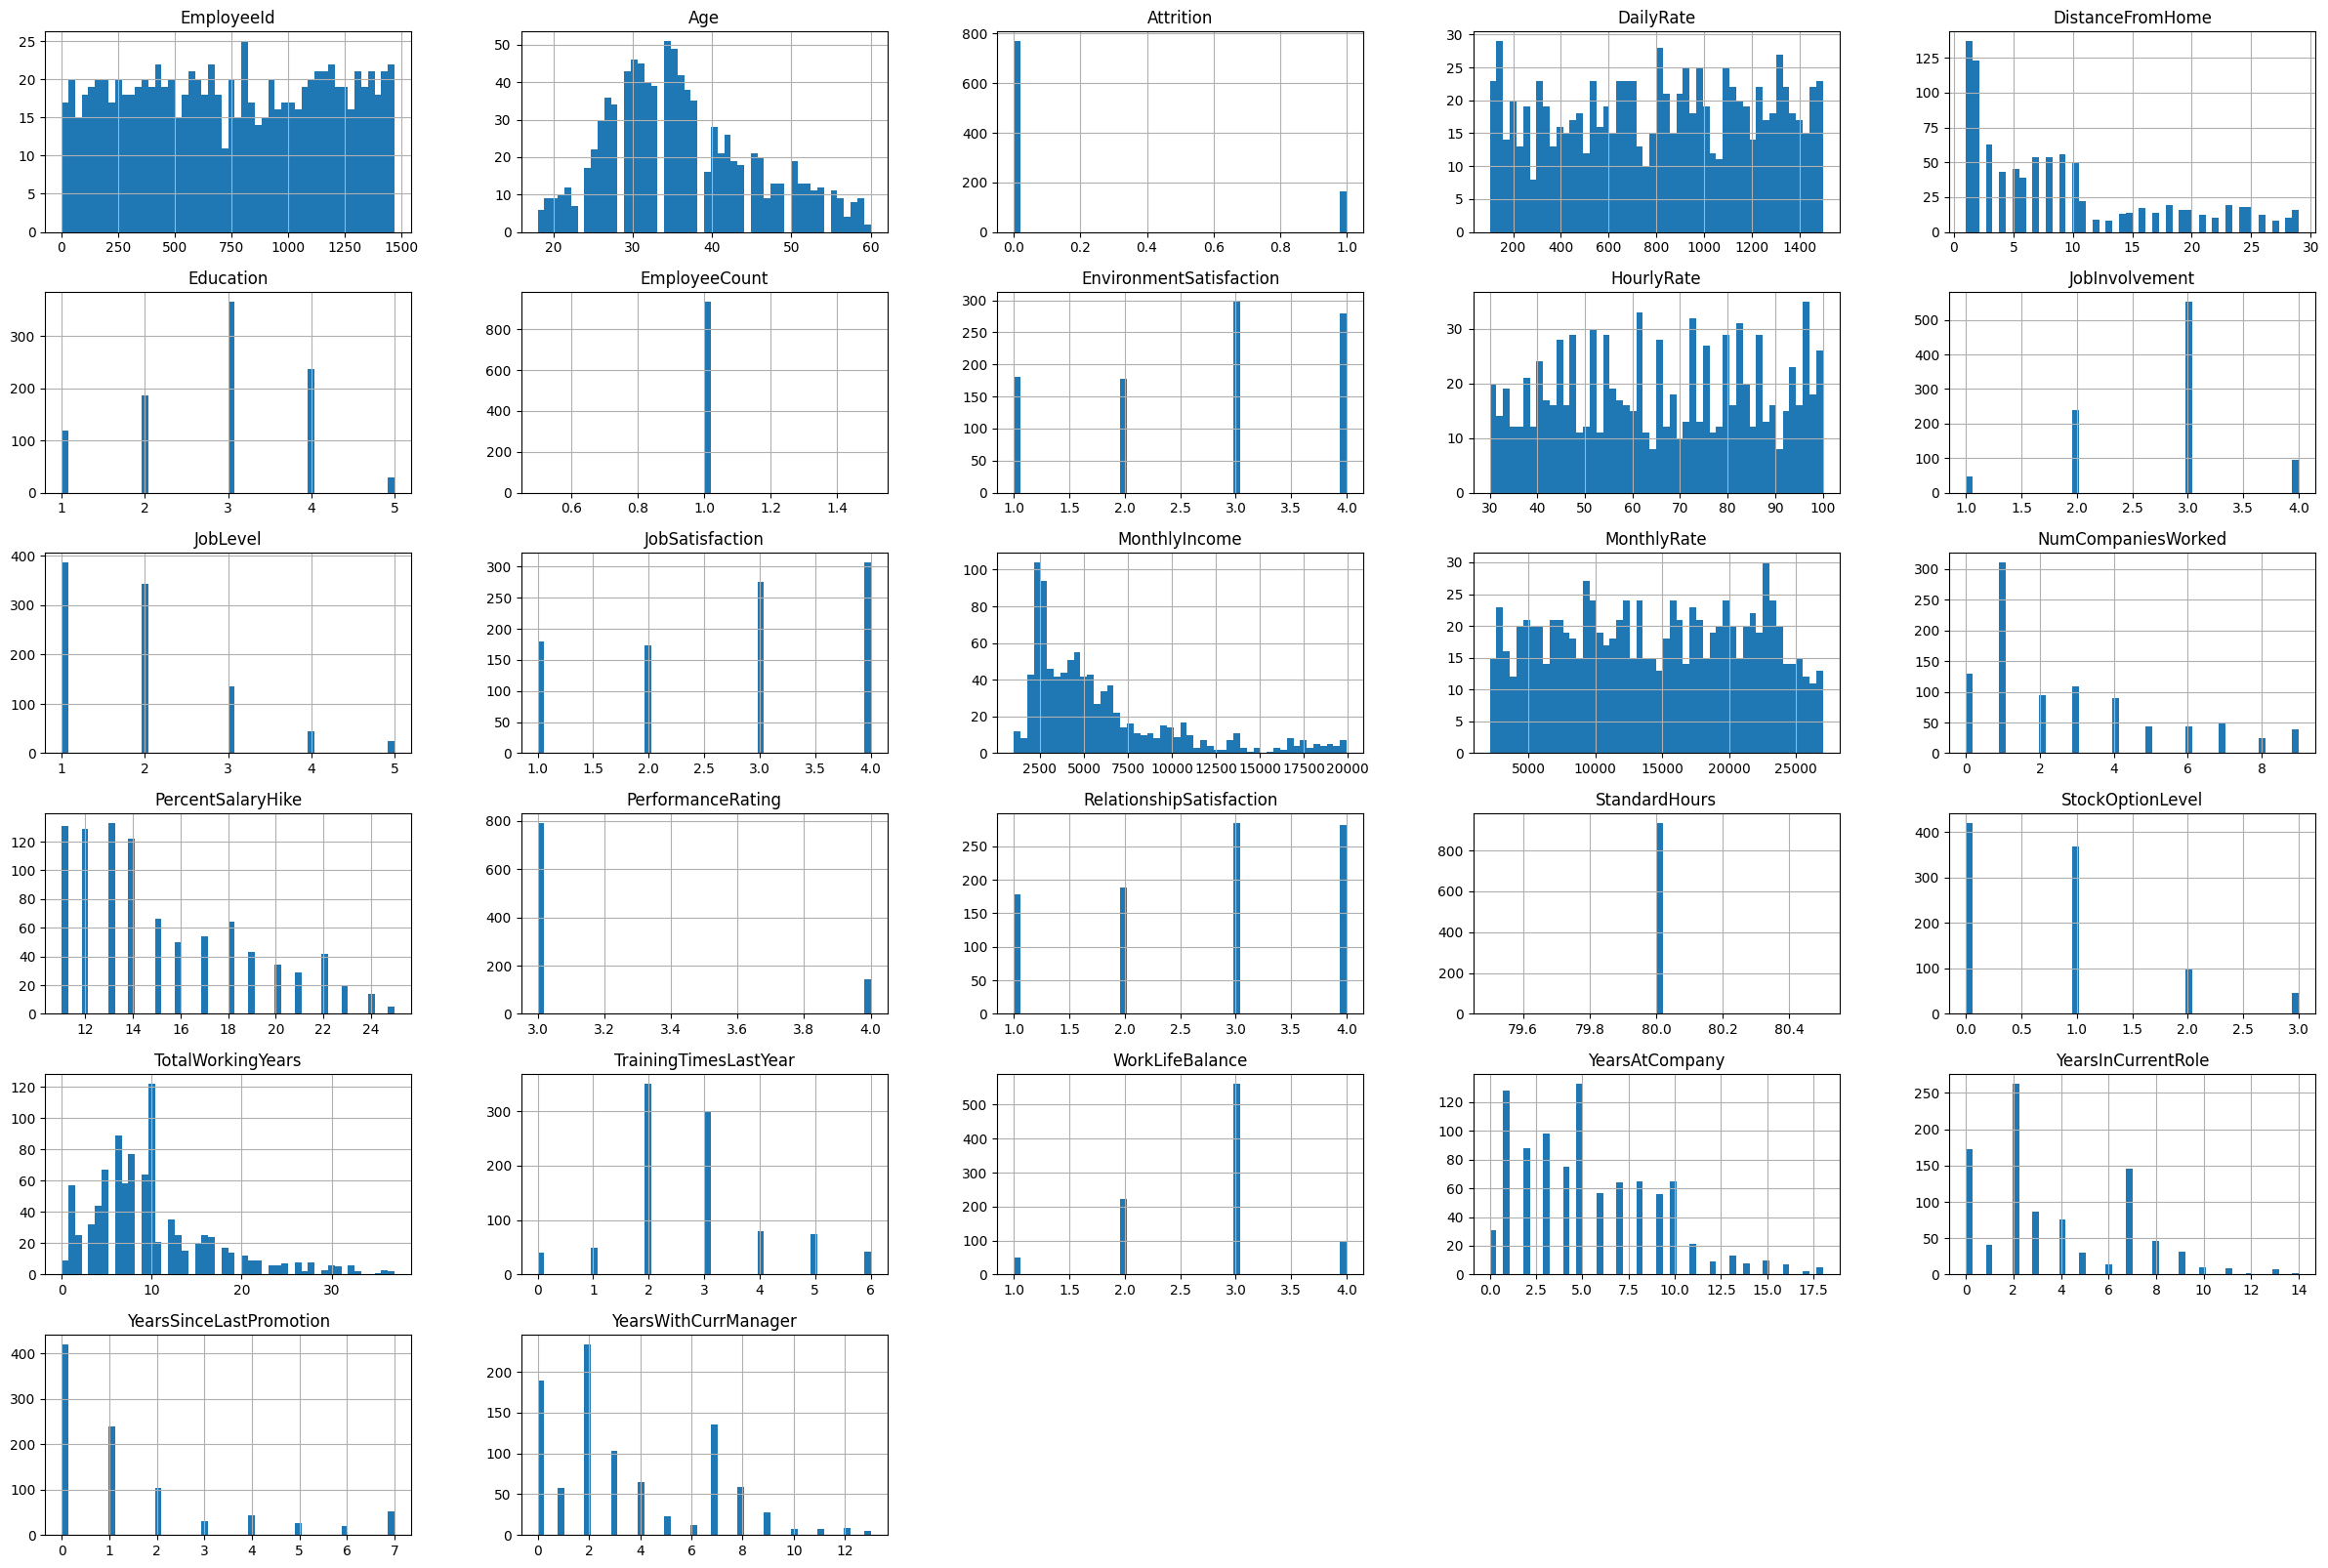

In [103]:

# menghitung numerik
new_df.hist(bins=50, figsize=(30, 20))
plt.show()

### Multivariate Analysis

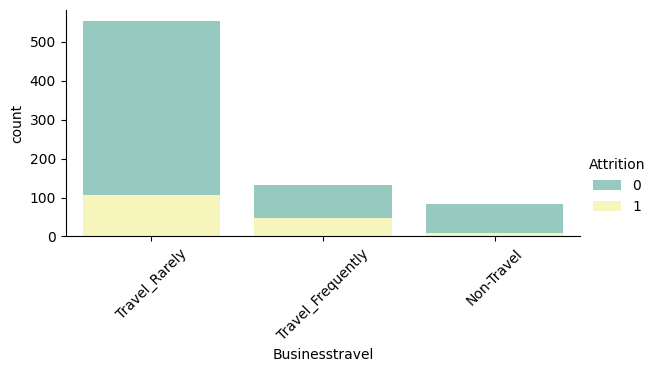

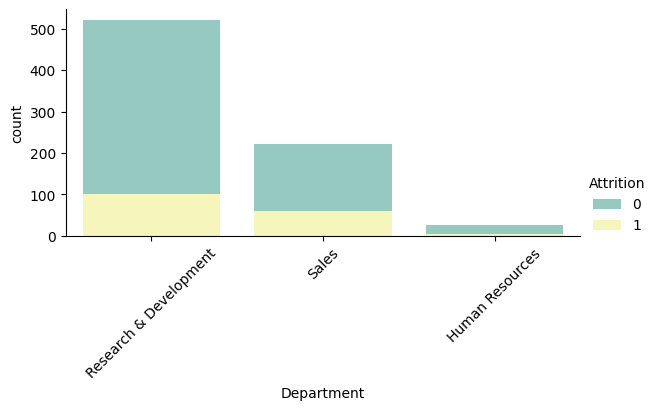

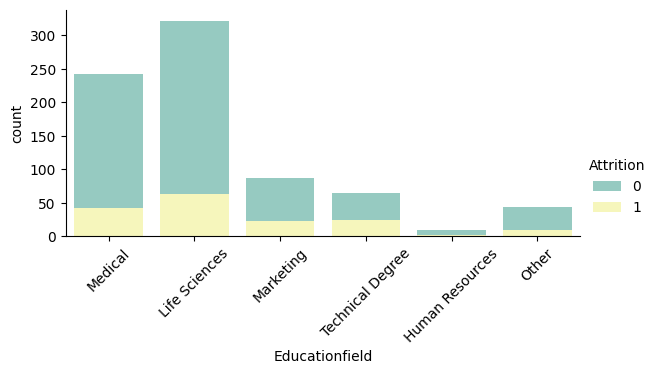

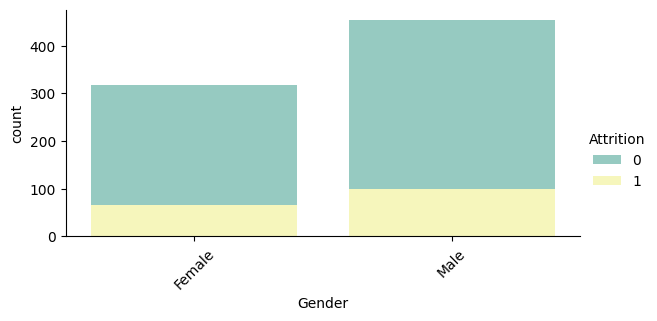

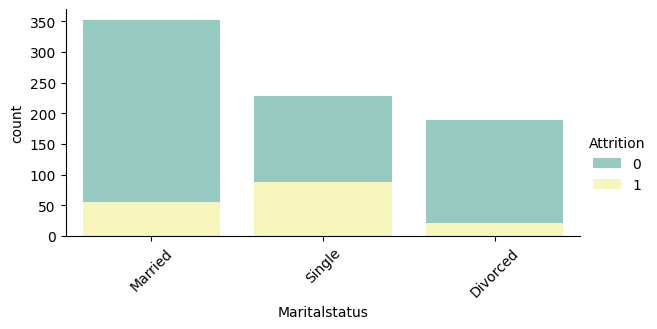

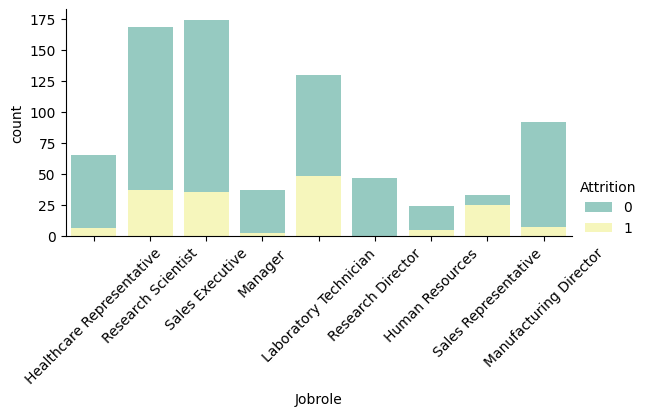

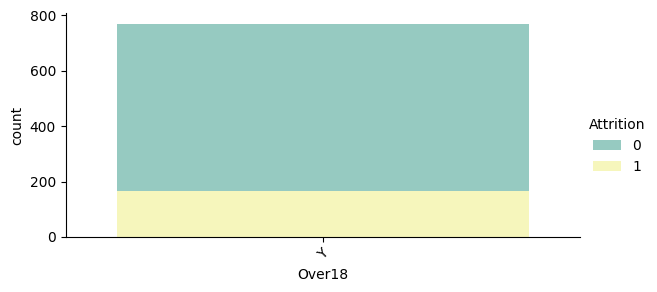

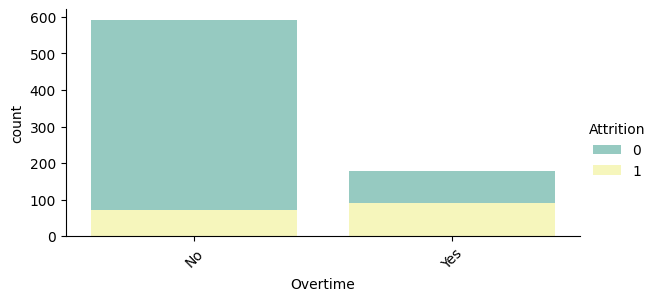

In [136]:
for column in categorical_features:
  sns.catplot(x=column, kind='count', dodge=False, palette="Set3", hue='Attrition', height=3, aspect=2, data=new_df)
  plt.xlabel(column.capitalize())
  plt.xticks(rotation=45)
  plt.show()
  print("\n")

### Correlation Check

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'MaritalStatus',
 'JobRole',
 'Over18',
 'OverTime']

In [146]:
tes_df = new_df[numerical_features]

In [141]:
tes_df

,BusinessTravel,Department,EducationField,Gender,MaritalStatus,JobRole,Over18,OverTime
1,Travel_Rarely,Research & Development,Medical,Female,Married,Healthcare Representative,Y,No
2,Travel_Rarely,Research & Development,Life Sciences,Male,Married,Research Scientist,Y,Yes
6,Travel_Rarely,Sales,Medical,Male,Married,Sales Executive,Y,Yes
7,Travel_Rarely,Research & Development,Medical,Male,Married,Manager,Y,Yes
8,Travel_Frequently,Research & Development,Medical,Female,Single,Laboratory Technician,Y,No
...,...,...,...,...,...,...,...,...
1464,Non-Travel,Research & Development,Technical Degree,Male,Single,Healthcare Representative,Y,No
1465,Travel_Rarely,Research & Development,Life Sciences,Female,Single,Manufacturing Director,Y,Yes
1467,Travel_Rarely,Research & Development,Life Sciences,Female,Married,Laboratory Technician,Y,Yes
1468,Non-Travel,Research & Development,Life Sciences,Male,Divorced,Research Scientist,Y,No


Text(0.5, 1.0, 'Korelasi Untuk Fitur Numerik')

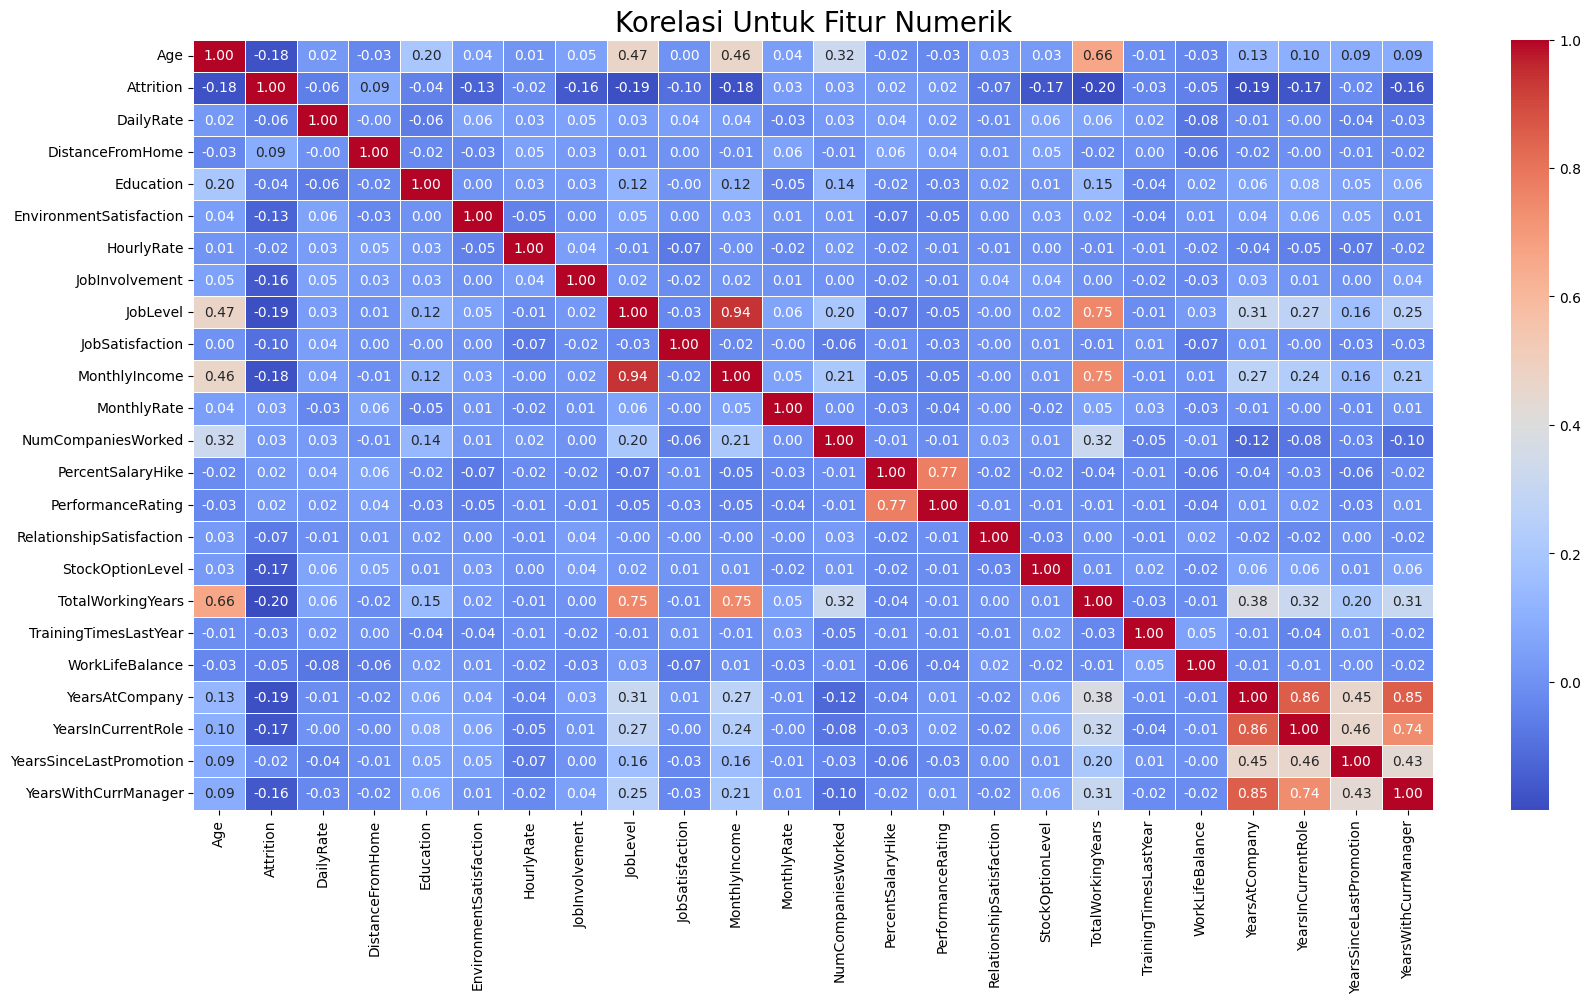

In [155]:
plt.figure(figsize=(20, 10))
sns.heatmap(data=new_df[numerical_features].corr(), annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title("Korelasi Untuk Fitur Numerik", size=20)

## Data Preparation

In [156]:
# ubah data attritium menjadi numerik integer
new_df['Attrition'] = new_df['Attrition'].astype(int)

C:\Users\rezha\AppData\Local\Temp\ipykernel_6712\4139440640.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Attrition'] = new_df['Attrition'].astype(int)


In [157]:
# menghapus kolom yang tidak diperlukan

new_df.drop(columns=['EmployeeCount', 'StandardHours', 'Over18'], inplace=True)

C:\Users\rezha\AppData\Local\Temp\ipykernel_6712\537205695.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.drop(columns=['EmployeeCount', 'StandardHours', 'Over18'], inplace=True)


In [182]:
# ganti tipe data menjadi binominal
new_df.replace({
    'Gender': {'Male': 1, 'Female': 0},
    'OverTime': {'Yes': 1, 'No': 0},
    }, inplace=True)

C:\Users\rezha\AppData\Local\Temp\ipykernel_6712\3480209409.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.replace({
C:\Users\rezha\AppData\Local\Temp\ipykernel_6712\3480209409.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  new_df.replace({


In [245]:
# ubah data kategorikal menjadi one hot encoding

encode_columns = ['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus']
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_data = encoder.fit_transform(new_df[encode_columns])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(encode_columns))

new_encoded_df = pd.concat([new_df.reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)

new_encoded_df.drop(encode_columns, axis=1, inplace=True)

In [186]:
print(new_encoded_df.shape)

(935, 46)


In [187]:
pd.set_option('display.max_columns', None)
new_encoded_df.tail()

,EmployeeId,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
930,1465,28,1,1366,24,2,2,1,72,2,3,1,8722,12355,1,0,12,3,1,0,10,2,2,10,7,1,9,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
931,1466,38,0,168,1,3,3,0,81,3,3,3,7861,15397,4,1,14,3,4,0,10,4,4,1,0,0,0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
932,1468,28,1,1485,12,1,3,0,79,3,1,4,2515,22955,1,1,11,3,4,0,1,4,2,1,1,0,0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
933,1469,40,0,458,16,2,3,1,74,3,1,3,3544,8532,9,0,16,3,2,1,6,0,3,4,2,0,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
934,1470,19,1,602,1,1,3,0,100,1,1,1,2325,20989,0,0,21,4,1,0,1,5,4,0,0,0,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


## Modeling

In [193]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [255]:
# bagi data latih dan data uji
x = new_encoded_df.drop(['Attrition', 'EmployeeId'], axis=1)
y = new_encoded_df['Attrition']


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [256]:

print(f"Total data latih : {len(x_train)}")
print(f"Total data uji : {len(x_test)}")

Total data latih : 748
Total data uji : 187


## Evaluation

In [258]:
nn_classifier = MLPClassifier(hidden_layer_sizes=12,
                              activation='relu',
                              n_iter_no_change=30,
                              solver='adam')
nn_classifier.fit(x_train, y_train)

c:\Users\rezha\miniconda3\envs\lab\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=12, n_iter_no_change=30)

Akurasi : 0.8128342245989305
              precision    recall  f1-score   support

           0       0.85      0.95      0.90       158
           1       0.20      0.07      0.10        29

    accuracy                           0.81       187
   macro avg       0.52      0.51      0.50       187
weighted avg       0.75      0.81      0.77       187



Text(0.5, 1.0, 'Confusion Matrix')

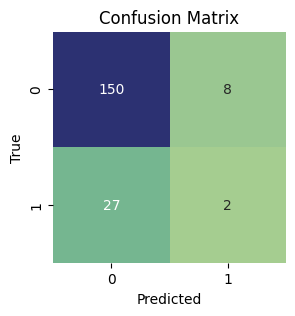

In [259]:
# akurasi
predict = nn_classifier.predict(x_test)

accuracy = accuracy_score(y_test, predict)
print(f"Akurasi : {accuracy}")

# classification report
class_report = classification_report(y_test, predict)
print(class_report)

# konfusion matriks
conf = confusion_matrix(y_test, predict)

plt.figure(figsize=(3,3))
sns.heatmap(conf, annot=True, fmt='d', cmap='crest', cbar=False)

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
     

In [273]:
joblib.dump(nn_classifier, 'model/employee_attrition_model.joblib')
joblib.dump(encoder, 'model/encoder.joblib')

['model/encoder.joblib']

## Testing

In [264]:
data_to_predict = {
   'Age': 38,
   'BusinessTravel': 'Travel_Frequently',
   'DailyRate': 1444,
   'Department': 'Human Resources',
   'DistanceFromHome': 1,
   'Education': 4,
   'EducationField': 'Other',
   'EnvironmentSatisfaction': 4,
   'Gender': 1,
   'HourlyRate': 88,
   'JobInvolvement': 3,
   'JobLevel': 1,
   'JobRole': 'Human Resources',
   'JobSatisfaction': 2,
   'MaritalStatus': 'Married',
   'MonthlyIncome': 2991,
   'MonthlyRate': 5224,
   'NumCompaniesWorked': 0,
   'OverTime': 1,
   'PercentSalaryHike': 11,
   'PerformanceRating': 3,
   'RelationshipSatisfaction': 2,
   'StockOptionLevel': 1,
   'TotalWorkingYears': 7,
   'TrainingTimesLastYear': 2,
   'WorkLifeBalance': 3,
   'YearsAtCompany': 6,
   'YearsInCurrentRole': 2,
   'YearsSinceLastPromotion': 3,
   'YearsWithCurrManager': 1,
} 

data_df = pd.DataFrame(data_to_predict, index=[0])

In [265]:
# convert to one hot encoding
test_encoded_data = encoder.transform(data_df[encode_columns])
test_data_df = pd.DataFrame(test_encoded_data, columns=encoder.get_feature_names_out(encode_columns))

In [266]:
data_df.drop(encode_columns, axis=1, inplace=True)
test_df = pd.concat([data_df.reset_index(drop=True), test_data_df.reset_index(drop=True)], axis=1)

In [271]:
result = nn_classifier.predict_proba(test_df)


label = ['No', 'Yes']
print("Probability", result)
print(f"Attrition : {label[np.argmax(result)]}")

Probability [[2.21810125e-04 9.99778190e-01]]
Attrition : Yes
